# Изучение закономерностей, определяющих успешность игр

 ***Описание проекта***
    Для анализа представлен датасет с историческими данными о продажах игр, оценками пользователей и экспертов, жанры и платформами (например, Xbox или PlayStation). Необходимо проанализировать дата сет и  выявить определяющие успешность игры закономерности.

***Краткое описание данных, представленных в датасете***

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
    
***Содержание проекта***

1. <a href='#the_destination'>Анализ исходных данных</a>

    1.1  <a href='#the_destination2'>Загрузка необходимых библиотек</a>

    1.2. <a href='#the_destination3'>Загрузка датасета и предварительный анализ</a>

    1.3 <a href='#the_destination4'>Заполнение пропусков</a>

    1.4 <a href='#the_destination5'>Поиск и удаление дубликатов</a>
    
    1.5 <a href='#the_destination6'>Изменение типов данных</a>
    
    1.6. <a href='#the_destination7'>Работа с значениями 'tbd'</a>
    
    1.7. <a href='#the_destination8'>Изменение названий столбцов</a>
    
    1.8.<a href='#the_destination9'>Проверка массива данных по жанрам на дублирующие жанры</a>
    
    1.9. <a href='#the_destination10'>Расчет суммарных продаж во всех регионах</a>

<a href='#the_destination11'>Вывод по разделу 1</a>

2. <a href='#the_destination12'>Исследовательский анализ данных</a>

    2.1. <a href='#the_destination13'>Анализ динамики выпуска игр в разные годы</a>
    
    2.2.<a href='#the_destination14'>Анализ динамики продаж по платформам</a>
    
    2.3.<a href='#the_destination15'>Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков</a>
    
    2.4.<a href='#the_destination16'>Анализ влияния жанров на прибыль</a>
    
<a href='#the_destination17'>Вывод по разделу 2</a>

3. <a href='#the_destination18'>Составление портрета пользователя каждого региона</a>

   3.1. <a href='#the_destination19'>Анализ динамики выпуска игр в разные годы</a>
    
   3.2 .<a href='#the_destination20'>Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5)</a>
    
<a href='#the_destination21'>Вывод по разделу 3</a>

4. <a href='#the_destination22'>Проверка гипотез</a>

    4.1.<a href='#the_destination23'>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a>
    
    4.2.<a href='#the_destination24'>Средние пользовательские рейтинги жанров Action и Sports  разные</a>
    
<a href='#the_destination25'>Вывод по разделу 4</a>

<a href='#the_destination26'>Общий вывод</a>

<a id='the_destination'></a>
# 1. Анализ исходных данных.


<a id='the_destination2'></a>
## 1.1. Загрузка необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
import plotly.express as px
from scipy.stats import mannwhitneyu

<a id='the_destination3'></a>
## 1.2. Загрузка датасета и предварительный анализ данных

Для оценки данных, содержащихся в датасете, загрузим данные при помощи библиотеки **pandas**, далее произведем оценку количества пропущенных значений, вызывав метод **info**, после чего оценим первые 10 строк, произведя вывод их на экран методом **head**.

In [2]:
# Загрузка датасета лога с данными 
games_data = pd.read_csv('/datasets/games.csv')

# Вызов данных о датасете 
games_data.info()

# Вывод первых 20 строк
display(games_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В датасете необходимо осуществить замену наименований стобцов, привести их к нижнему регистру. В столбцах имя, дата выпуска игры, жанр, оценка критиков, оценка игроков и рейтинг присутствуют отсутствующие названия. Игры с отсутствующим именем и жанром необходимо рассмотреть внимательнее, если данные нельзя заполнить, например, воспользовавшись информацией с сайта https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80, то эти строки предпочтительно удалить. Данные в строке год выпуска надо проанализировать дополнительно, по возможности вывести уникальные названия и посмотреть возможно ли заполнить эти данные. Эти данные могли как пропасть при переносе так и не быть занесены в датасет.


In [3]:
# Проверка игр с отстустсвующим названием и(или) жанром
display(games_data.query('Genre.isnull()'))
games_data.dropna(subset = ['Genre'], inplace = True)
print('Количество игр с неуказанным именем и жанром', games_data.query('Genre.isnull()')['Name'].count())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Количество игр с неуказанным именем и жанром 0


In [4]:
# Проверка игр с отсутствующим годом выпуска
print('Количество игр без указания года выпуска:')
display(games_data.query('Year_of_Release.isnull()')['Name'].count())
# массив имен игр с отсутствующим годом выпуска
names_without_year = games_data.query('Year_of_Release.isnull()')['Name'].unique()

display(games_data.query('Name == "Madden NFL 2004"'))

Количество игр без указания года выпуска:


269

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Как оказалось некоторые из игр с неуказанным годом издания имеют издания того же года с указанным годом издания. Такие игры надо выявить и заполнить их год издания. 

<a id='the_destination4'></a>
## 1.3. Заполнение пропусков

После создания массива уникальных имен игр без даты выпуска, принято решение в цикле определить повторяющиеся более 1 раза позиции и заполнить их год выпуска по среднему значению для разных платформ.

In [5]:
# заполнение ячеек игр с повторяющимися на разных платформах названиями
for name in names_without_year:
    if games_data.loc[games_data['Name'] == name]['Year_of_Release'].count() > 0:
        mean_year = games_data.loc[games_data['Name'] == name]['Year_of_Release'].mean()
        mask = games_data['Name'] == name
        games_data.loc[mask, 'Year_of_Release']= games_data.loc[mask, 'Year_of_Release'].fillna(mean_year)

display(games_data.query('Name == "Madden NFL 2004"'))

print('Количество игр без указания года выпуска:')
display(games_data.query('Year_of_Release.isnull()')['Name'].count())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Количество игр без указания года выпуска:


146

Количество игр без указания года выпуска снизилось с 269 до 146. Оставшиеся игры было принято решение оставить без изменений, не заполняя по справочнику. 

<a id='the_destination5'></a>
## 1.4. Поиск и удаление дубликатов

In [6]:
print('Количество дубликатов', games_data.duplicated().sum())

Количество дубликатов 0


Дубликаты не найдены

<a id='the_destination6'></a>
## 1.5. Изменение типов данных 

In [7]:
games_data['Year_of_Release'] = games_data['Year_of_Release'].astype('int64', errors='ignore')
games_data['Critic_Score'] = games_data['Critic_Score'].astype('int64', errors='ignore')
display(games_data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
display(games_data.query('Year_of_Release == False or Year_of_Release == True')['Year_of_Release'].count())
games_data['Critic_Score'] = games_data['Critic_Score'].astype('Int64', errors='raise')
# поиск в датафрейме причины почему не переводится в тип Int64
for i in range(len(games_data)):
    try:
        one_row = games_data[i:i+1]['Year_of_Release'].astype('Int64', errors='raise')
    except:
        print(games_data[i:i+1])
        
# округление дат релизов 
games_data['Year_of_Release'] = games_data['Year_of_Release'].round()
games_data['Year_of_Release'] = games_data['Year_of_Release'].astype('Int64', errors='raise')
games_data.info()

0

               Name Platform  Year_of_Release    Genre  NA_sales  EU_sales  \
609  Space Invaders     2600      1998.333333  Shooter      2.36      0.14   

     JP_sales  Other_sales  Critic_Score User_Score Rating  
609       0.0         0.03           NaN        NaN    NaN  
                           Name Platform  Year_of_Release   Genre  NA_sales  \
1699  Hitman 2: Silent Assassin       XB           2002.5  Action      0.76   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
1699      0.38       0.0         0.05            84          8      M  
                  Name Platform  Year_of_Release Genre  NA_sales  EU_sales  \
2157  Wheel of Fortune      PS2          2003.75  Misc      0.47      0.36   

      JP_sales  Other_sales  Critic_Score User_Score Rating  
2157       0.0         0.12           NaN        tbd      E  
              Name Platform  Year_of_Release Genre  NA_sales  EU_sales  \
2281  Namco Museum       XB      2001.333333  Misc      0.77   

Изменены типы данных для колонок дата выпуска и оценка критиков, так как максимальная оценка критиков 100 баллов то можно ограничиться целочисленными значениями.

<a id='the_destination7'></a>
## 1.6. Работа с значениями 'tbd'

In [9]:
# определение количества значений tbd в столбцах с рейтингом
print('Количество значений tbd в столбце  User_Score', games_data.query('User_Score == "tbd"')['Name'].count())
print('Количество значений tbd в столбце  Critic_Score', games_data.query('Critic_Score == "tbd"')['Name'].count())
print('Количество значений tbd в столбце  Rating', games_data.query('Rating == "tbd"')['Name'].count())
print('Количество значений NaN до замены', games_data.query('User_Score.isnull()')['Name'].count())
# замена значений
games_data['User_Score'] = games_data['User_Score'].replace('tbd', 'NaN')
games_data['User_Score'] = games_data['User_Score'].astype('float64', errors='ignore')
print('Количество значений NaN после замены', games_data.query('User_Score.isnull()')['Name'].count())

Количество значений tbd в столбце  User_Score 2424
Количество значений tbd в столбце  Critic_Score 0
Количество значений tbd в столбце  Rating 0
Количество значений NaN до замены 6699
Количество значений NaN после замены 9123


Было решено заменить значения tbd - то есть значений "в обработке", еще не сформированных пользователями, на  NaN, чтобы упростить обработку данных

<a id='the_destination8'></a>
## 1.7. Изменение названий столбцов 

In [10]:
# массив названий столбцов
columns_names = games_data.columns
list_of_names = []
# перевод в нижний регистр названия столбцов
for name in columns_names:
    name = name.lower()
    list_of_names.append(name)
print(list_of_names)
# замена названий столбцов
games_data.set_axis(list_of_names, axis='columns', inplace=True)
display(games_data.columns)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='the_destination9'></a>
## 1.8 Проверка массива данных по жанрам на дублирующие жанры

In [11]:
display(games_data['genre'].unique())

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Повторяющихся жанров не наблюдается, поэтому вносить изменения в жанры нет необходимости

<a id='the_destination10'></a>
## 1.9 Расчет суммарных продаж во всех регионах

In [12]:
# создание столбца суммарных продаж
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

display(games_data.tail())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01


<a id='the_destination11'></a>
# Вывод по разделу 1.

В процессе анализа и предобработки данных был осуществлен анализ представленного датасета. Были выявлены пропуски в значениях столбцов год выпуска, жанр, название игры, рейтинг пользователей, рейтинг критиков и рейтинг ESRB. Строки с пропущенными значениями имени и жанра были удалены, так как не несут необходимой для анализа информации. Ячейки с пропущенными значениями года выпуска были частично заполнены для игр, одновременно присутствующих в датасете в форматах на нескольких платформах, в ячейки были внесены средние значения для всех видов платформ. Оставшиеся ячейки были оставлены незаполненными в столбце год выпуска. В столбце рейтинг пользователей было выявлено значение tbd - что означает, что ячейка еще в работе, эти значения были заменены на NaN. Типы столбцов с рейтингом критиков и годом выхода были приведены к целочисленным значениям. Также были изменены названия столбцов на прописные и проверены жанры на отсутствие дублирующих жанров.
Также был добавлен столбец с значением суммарных продаж во всех регионах.

<a id='the_destination12'></a>
# 2.  Исследовательский анализ данных

In [13]:
# создание функции построения вспомогательных осей и названий графика
def plot_names(ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

<a id='the_destination13'></a>
## 2.1. Анализ динамики выпуска игр в разные годы

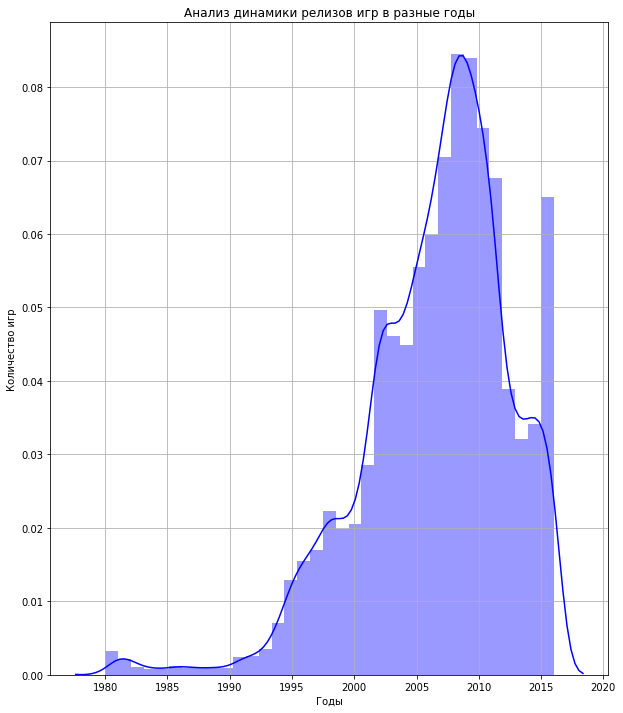

In [14]:
# построение графика динамики выпуска игр в разные годы
# создание иллюстрации
fig = plt.figure(figsize=(10, 12))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()
# создание графика
sns.distplot(games_data['year_of_release'], bins=35, color='blue', ax=graph)
# создание названий
plot_names(graph, 'Анализ динамики релизов игр в разные годы', 'Годы', 'Количество игр')

Как хорошо видно на гистограмме - пик релизов игр приходится на 1990-2015 года, после 2010 года наблюдается спад, затем опять рост.

<a id='the_destination14'></a>
## 2.2. Анализ динамики продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

platform total_sales             
                    sum   min    max
16      PS2     1255.77  0.00  20.81
28     X360      971.42  0.01  21.82
17      PS3      939.65  0.00  21.05
26      Wii      907.51  0.01  82.54
4        DS      806.12  0.01  29.80
15       PS      730.86  0.01  10.95
6       GBA      317.85  0.01  15.84
18      PS4      314.14  0.01  14.63
19      PSP      294.05  0.01   7.68
13       PC      259.52  0.01   8.01
2       3DS      259.00  0.01  14.60
29       XB      257.74  0.01   8.48
5        GB      255.46  0.06  31.38
11      NES      251.05  0.06  40.24
10      N64      218.68  0.01  11.90
23     SNES      200.04  0.01  20.62
7        GC      198.93  0.01   7.06
30     XOne      159.32  0.01   7.39
0      2600       96.98  0.07   7.81
27     WiiU       82.19  0.01   7.09
20      PSV       54.07  0.01   1.96
21      SAT       33.59  0.02   1.93
8       GEN       28.35  0.03   6.02
3        DC       15.95  0.02   2.41
22      SCD        1.86  0.04   1.50
12       NG        1.44  0.02   0.25
25       WS        1.42  0.03   0.51
24     TG16        0.16  0.02   0.14
1       3DO        0.10  0.02   0.06
9        GG        0.04  0.04   0.04
14     PCFX        0.03  0.03   0.03

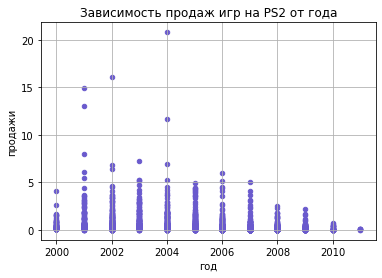

In [15]:
# Группировка продаж по платформам 
games_data_grouped = games_data.groupby('platform').agg({'total_sales': ['sum', 'min', 'max']}).reset_index()
display(games_data_grouped.sort_values(by=('total_sales', 'sum'), ascending=False))

#Выбор платформ по продажам
games_PS2= games_data.query('platform == "PS2"')
games_X360 = games_data.query('platform == "X360"')
games_PS3 = games_data.query('platform == "PS3"')
games_Wii = games_data.query('platform == "Wii"')
games_DS = games_data.query('platform == "DS"')

#Построение графиков распределения по годам
graphPS2= games_PS2.plot(x='year_of_release', y='total_sales', kind='scatter', grid=True, color='slateblue')
plot_names(graphPS2, 'Зависимость продаж игр на PS2 от года', 'год', 'продажи')

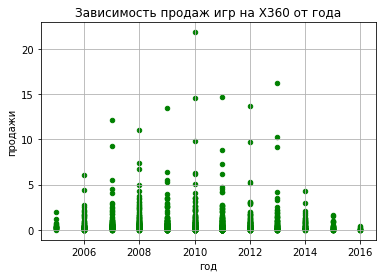

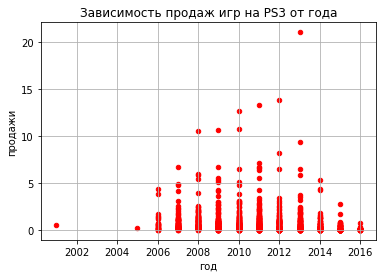

In [16]:
graphX360= games_X360.plot.scatter(x='year_of_release', y='total_sales', grid=True, color='green')
plot_names(graphX360, 'Зависимость продаж игр на X360 от года', 'год', 'продажи')

graphPS3= games_PS3.plot.scatter(x='year_of_release', y='total_sales', grid=True, color='red')
plot_names(graphPS3, 'Зависимость продаж игр на PS3 от года', 'год', 'продажи')


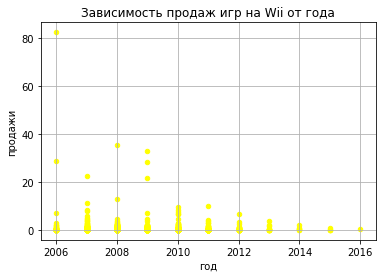

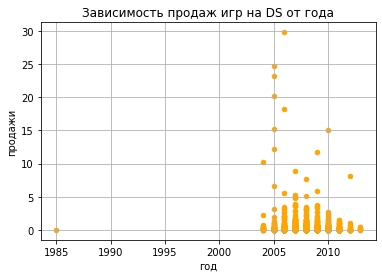

In [17]:
graphWii= games_Wii.plot.scatter(x='year_of_release', y='total_sales', grid=True, color='yellow')
plot_names(graphWii, 'Зависимость продаж игр на Wii от года', 'год', 'продажи')

graphDS= games_DS.plot.scatter(x='year_of_release', y='total_sales', grid=True, color='orange')
plot_names(graphDS, 'Зависимость продаж игр на DS от года', 'год', 'продажи')

На графиках хорошо видно, что примерно за 10 лет происходит развитие и угасание платформы. 

Принимаем за актуальный период -***период в 10 лет - с 2006 по 2016 год***, сюда попадает и пик 2010 года, и также это соотносится с периодом развития угасания платформ.

In [18]:
games_data_upd = games_data.query('year_of_release >= 2012')

# Группировка продаж по платформам 
games_data_grouped_upd = games_data_upd.groupby('platform').agg({'total_sales': ['sum', 'min', 'max', 'median'], 'year_of_release': ['first']}).reset_index()
display(games_data_grouped_upd.sort_values(by=('year_of_release', 'first'), ascending=False))


platform total_sales                     year_of_release
                    sum   min    max median           first
4       PS4      314.14  0.01  14.63   0.20            2015
10     XOne      159.32  0.01   7.39   0.22            2015
6       PSV       49.18  0.01   1.96   0.05            2014
8      WiiU       82.19  0.01   7.09   0.22            2014
0       3DS      195.01  0.01  14.60   0.11            2013
3       PS3      289.71  0.01  21.05   0.20            2013
9      X360      237.52  0.01  16.27   0.31            2013
1        DS       13.21  0.01   8.06   0.05            2012
2        PC       63.51  0.01   5.14   0.08            2012
5       PSP       11.69  0.01   0.36   0.04            2012
7       Wii       36.60  0.01   6.76   0.18            2012

При предварительной оценки таблицы были получены данные, которые позволяют нам сделать вывод, что несмотря на меньшие продажи платформы PS4, XOne, PSV, 3DS, WiiU могут быть перспективными в связи с тем, что были выпущены недавно и еще не достигли уровня насыщения. Было принято решение проверить это при помощи анализа продаж по годам для каждой из платформ 

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

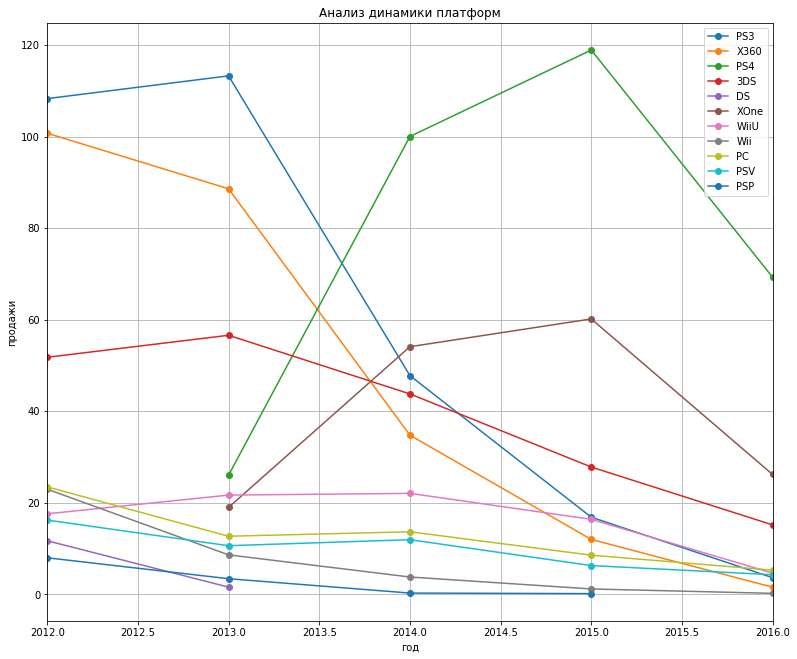

In [19]:
# список всех рассматриваемых платформ
list_of_names_platforms =  games_data_upd['platform'].unique()
display(list_of_names_platforms)


# построение графиков с динамикой продаж по годам
# создание иллюстрации
fig = plt.figure(figsize=(15, 12))
# добавление одного графика на иллюстрацию
graph = fig.add_subplot()

for element in list_of_names_platforms:
    games_platform = games_data_upd[games_data_upd['platform'] == element]
    games_platform = games_platform.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()
    games_platform.plot(x='year_of_release', y='total_sales', style='-o',figsize=(13, 11), grid=True, ax=graph)
    plot_names(graph, 'Анализ динамики платформ', 'год', 'продажи')
plt.legend(list_of_names_platforms, loc='best')

После анализа графиков стало видно, что наиболее перспективны XOne, PS4, 3DS, PS3, WiiU

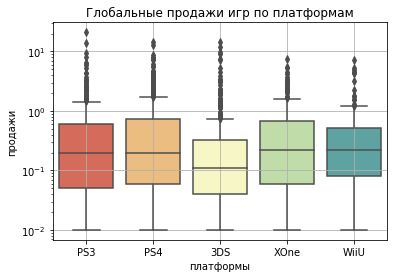

In [20]:
best_platforms = ['XOne', 'PS4', '3DS', 'PS3', 'WiiU']
games_data_upd_best_platforms = games_data_upd.query('platform in @best_platforms')
graph= sns.boxplot(x = 'platform', y = 'total_sales', data= games_data_upd_best_platforms, palette='Spectral')
graph.set_yscale('log')
plot_names(graph, 'Глобальные продажи игр по платформам', 'платформы', 'продажи')

С учетом получившихся данных по анализу платформ можно выделить наиболее перспективные платформы с точки зрения продаж и развития их - ***PS4, 3DS, PC, XOne, X360 и PS3***.

<a id='the_destination15'></a>
## 2.3. Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13982,NASCAR Heat Evolution,XOne,2016,Racing,0.03,0.00,0.0,0.00,NaN,1.6,E,0.03
9852,Tony Hawk's Pro Skater 5,XOne,2015,Sports,0.09,0.02,0.0,0.01,39,2.1,T,0.12
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.0,0.02,23,3.0,T,0.20
7579,NBA Live 14,XOne,2013,Sports,0.16,0.02,0.0,0.02,36,3.1,E,0.20
11222,Rugby 15,XOne,2015,Sports,0.03,0.05,0.0,0.01,20,3.1,E,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.0,0.00,NaN,NaN,T,0.01
16590,Hitman (2016),XOne,2016,Action,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01
16595,Rabbids Invasion: The Interactive TV Show,XOne,2014,Misc,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01


Коэффициент корреляции Пирсона для оценки корреляции между отзывами пользователей и продажами -0.068925
Коэффициент корреляции Пирсона для оценки корреляции между отзывами критиков и продажами 0.416998


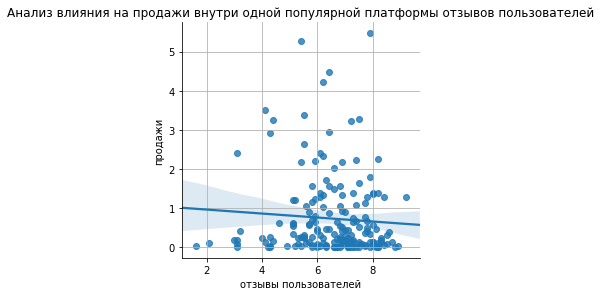

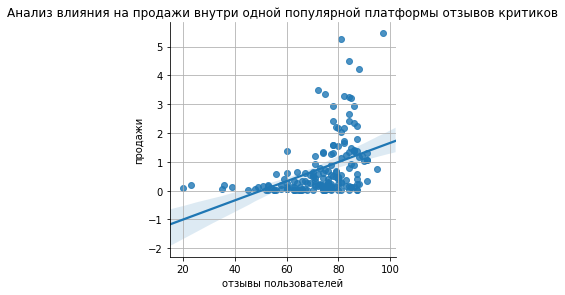

In [21]:
games_platform_XOne = games_data_upd[games_data_upd['platform'] == 'XOne']
display(games_platform_XOne.sort_values(by='user_score', ascending=True))

# Влияние отзывов пользователей
graph= sns.lmplot(x='user_score', y='total_sales', size=4, data = games_platform_XOne)
#graph= games_platform_XOne.plot(, kind='scatter',figsize=(8, 10), grid=True, color= 'red')
plt.title('Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей')
graph.set(xlabel='отзывы пользователей', ylabel='продажи')
plt.grid(True)
print('Коэффициент корреляции Пирсона для оценки корреляции между отзывами пользователей и продажами {:2f}'.format(games_platform_XOne['total_sales'].corr(games_platform_XOne['user_score'])))

# Влияние отзывов критиков
games_platform_XOne['critic_score'] = games_platform_XOne['critic_score'].astype('float64', errors='ignore')

graph= sns.lmplot(x='critic_score', y='total_sales', size=4, data = games_platform_XOne)

#graph= games_platform_XOne.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(4, 5), grid=True, color= 'green')
plt.title('Анализ влияния на продажи внутри одной популярной платформы отзывов критиков')
graph.set(xlabel='отзывы пользователей', ylabel='продажи')
plt.grid(True)
print('Коэффициент корреляции Пирсона для оценки корреляции между отзывами критиков и продажами {:2f}'.format(games_platform_XOne['total_sales'].corr(games_platform_XOne['critic_score'])))

Хорошо видно на гистограммах, что положительные отзывы критиков и пользователей повышают продажи, это подтверждается коэффициентами корреляции между продажами и отзывами. Вероятнее всего данная динамика будет наблюдаться и на других платформах.

<a id='the_destination16'></a>
## 2.4. Анализ влияния жанров на прибыль

In [22]:
games_data_grouped_genre = games_data_upd.groupby('genre').agg({'total_sales': ['sum', 'min', 'max','mean', 'median','count']}).reset_index()
display(games_data_grouped_genre.sort_values(by=('total_sales', 'median'), ascending=False))

genre total_sales                                    
                         sum   min    max      mean median count
8        Shooter      304.75  0.01  14.63  1.285865  0.430   237
10        Sports      181.07  0.01   8.58  0.675634  0.240   268
4       Platform       61.00  0.01   9.90  0.717647  0.210    85
7   Role-Playing      192.80  0.01  14.60  0.521081  0.140   370
6         Racing       53.50  0.01   7.09  0.465217  0.140   115
2       Fighting       44.49  0.01   7.55  0.408165  0.130   109
0         Action      446.41  0.01  21.05  0.428828  0.120  1041
3           Misc       85.28  0.01   9.18  0.441865  0.120   193
9     Simulation       35.12  0.01   9.17  0.439000  0.120    80
11      Strategy       13.34  0.01   1.67  0.187887  0.080    71
5         Puzzle        4.89  0.01   1.19  0.174643  0.045    28
1      Adventure       29.43  0.01   1.66  0.097450  0.030   302

При анализе распределения игр по жанрам можно отметить, что наиболее прибыльными являются игры жанра "shooter", несмотря на то, что их выпускается меньше, чем игр жанра "action", среднее значение прибыли у них выше, далее идут игры жанра "platform", "sports", "racing" и 'role-playing". Несмотря на то, что общая прибыль от игр жанра "adenture" высокая вероятно это связано с тем, что выпускается много игр и среди них есть очень успешные и довольно проходные, об этом говворит и высокий разброс между средним и медианным значениями. 

<a id='the_destination17'></a>
# Вывод по разделу 2

   Проанализировав данные датасета был определен пик релизов игр приходится на 1990-2015 года, после 2010 года наблюдается спад, затем опять рост. Также было определено время развития и угасания платформы - примерно за 10 лет. За актуальный период был принят период в 5 лет - с 2012 по 2017 год, это соотносится с периодом развития угасания платформ и спада и роста релизов.
   Были выделены наиболее перспективные платформы с точки зрения продаж и развития их - ***PS4, 3DS, PC, XOne, X360 и PS3***.
   Определено, что между отзывами пользователей и продажами существует очень слабая связь, между отзывами критиков и продажами связь более заметная, коэффициент корреляции значительно выше и относительно линии регрессии разброс значений меньше, связь однако незначительная.
   При анализе распределения игр по жанрам было определено, что наиболее прибыльными являются игры жанра "shooter", несмотря на то, что их выпускается меньше, чем игр жанра "action", среднее значение прибыли у них выше, далее идут игры жанра "platform", "sports", "racing" и 'role-playing". Несмотря на то, что общая прибыль от игр жанра "adenture" высокая вероятно это связано с тем, что выпускается много игр и среди них есть очень успешные и довольно проходные, об этом говворит и высокий разброс между средним и медианным значениями.

<a id='the_destination18'></a>
# 3. Составление портрета пользователя каждого региона

<a id='the_destination19'></a>
## 3.1 Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5)

In [23]:
# Группировка продаж по платформам 
games_NA_grouped = games_data.groupby('platform').agg({'na_sales': ['sum', 'min', 'max']}).reset_index()
display(games_NA_grouped.sort_values(by=('na_sales', 'sum'), ascending=False).head())

games_EU_grouped = games_data.groupby('platform').agg({'eu_sales': ['sum', 'min', 'max']}).reset_index()
display(games_EU_grouped.sort_values(by=('eu_sales', 'sum'), ascending=False).head())

games_JP_grouped = games_data.groupby('platform').agg({'jp_sales': ['sum', 'min', 'max']}).reset_index()
display(games_JP_grouped.sort_values(by=('jp_sales', 'sum'), ascending=False).head())

platform na_sales            
                 sum  min    max
28     X360   602.47  0.0  15.00
16      PS2   583.84  0.0   9.43
26      Wii   496.90  0.0  41.36
17      PS3   393.49  0.0   7.02
4        DS   382.40  0.0  11.28

platform eu_sales            
                 sum  min    max
16      PS2   339.29  0.0   5.49
17      PS3   330.29  0.0   9.09
28     X360   270.76  0.0   5.14
26      Wii   262.21  0.0  28.96
15       PS   213.61  0.0   3.87

platform jp_sales           
                 sum  min   max
4        DS   175.57  0.0  6.50
15       PS   139.82  0.0  4.10
16      PS2   139.20  0.0  3.61
23     SNES   116.55  0.0  3.81
2       3DS   100.67  0.0  4.39

На основе анализа данных таблиц, сгруппированных по продажам в разных регионах хорошо видно, что в Северной Америке отдат предпочтение приставкам Playstation, XBox, в меньшей степени играя в Nintendo. Такая же динамика, только с предпочтением в сторону PlayStation, а не XBox наблюдается и в Европе. На азиатском рынке предпочтение отдается Nintendo и в меньшей степени PlayStation. 

In [24]:
games_NA_grouped = games_data.groupby('genre').agg({'na_sales': ['sum', 'mean', 'count']}).reset_index()
display(games_NA_grouped.sort_values(by=('na_sales', 'mean'), ascending=False).head())

games_EU_grouped = games_data.groupby('genre').agg({'eu_sales': ['sum','mean', 'count']}).reset_index()
display(games_EU_grouped.sort_values(by=('eu_sales', 'mean'), ascending=False).head())

games_JP_grouped = games_data.groupby('genre').agg({'jp_sales': ['sum', 'mean', 'count']}).reset_index()
display(games_JP_grouped.sort_values(by=('jp_sales', 'mean'), ascending=False).head())

genre na_sales                
                  sum      mean count
4   Platform   445.50  0.501689   888
8    Shooter   592.24  0.447649  1323
10    Sports   684.43  0.291495  2348
6     Racing   359.35  0.287710  1249
2   Fighting   223.36  0.263086   849

genre eu_sales                
                  sum      mean count
8    Shooter   317.34  0.239864  1323
4   Platform   200.35  0.225619   888
6     Racing   236.51  0.189359  1249
10    Sports   376.79  0.160473  2348
0     Action   519.13  0.154090  3369

genre jp_sales                
                     sum      mean count
7  Role-Playing   355.41  0.237256  1498
4      Platform   130.83  0.147331   888
2      Fighting    87.48  0.103039   849
5        Puzzle    57.31  0.098810   580
9    Simulation    63.80  0.073081   873

На Североамериканском рынке предпочтение отдают играм жанров shooter, platform, sports, racing, Fighting, в Европе жанр fighting замещается жанром action, Азиатский рынок существенно отличается от Европейского и Североамеринского, основные популярные жанры тут включают кроме platform, role-playing, puzzle, simulation и fighting. Надо отметить что жанр platform популярен во всех странах.

<a id='the_destination20'></a>
## 3.2 Оценка влияния рейтинга ESRB на продажи в отдельном регионе

In [25]:
games_NA_grouped = games_data.groupby('rating').agg({'na_sales': ['sum', 'mean', 'count']}).reset_index()
display(games_NA_grouped.sort_values(by=('na_sales', 'mean'), ascending=False).head())

rating na_sales                
              sum      mean count
0     AO     1.26  1.260000     1
4    K-A     2.56  0.853333     3
5      M   748.48  0.478874  1563
1      E  1292.99  0.324058  3990
7      T   759.75  0.256586  2961

Рейтинг ESBR влияет на продажи, но так как игры рейтинга АО (18+) и КА (6+) представлены только несколькими играми, то говорить в полной мере о влиянии рейтинга ESBR нельзя. Можно сказать, что игры M (17+) приносят больше прибыли, чем игры Е(6+) и Т (13+), но в полной мере оценить это нельзя без всех показателей рейтинга. Однако, учитывая, что игр для взрослых выпускается меньше, о средний доход для них выше можно говорить, что игры с рейтингом М продаются лучше, чем с рейтингом Е и Т в Северной Америке.

In [26]:
games_EU_grouped = games_data.groupby('rating').agg({'eu_sales': ['sum', 'mean', 'count']}).reset_index()
display(games_EU_grouped.sort_values(by=('eu_sales', 'mean'), ascending=False).head())

rating eu_sales                
              sum      mean count
0     AO     0.61  0.610000     1
5      M   483.97  0.309642  1563
1      E   710.25  0.178008  3990
7      T   427.03  0.144218  2961
2   E10+   188.52  0.132761  1420

В Европе, как и в Северной Америке, наибольшую успешность имеют игры рейтинга М(17+), в отличие от Америки в Европе чуть менее прибыльны игры для подростков Т, по сравнению с играми для детей Е.

In [27]:
games_JP_grouped = games_data.groupby('rating').agg({'jp_sales': ['sum', 'mean', 'count']}).reset_index()
display(games_JP_grouped.sort_values(by=('jp_sales', 'mean'), ascending=False).head())

rating jp_sales                
              sum      mean count
4    K-A     1.46  0.486667     3
7      T   151.40  0.051131  2961
1      E   198.11  0.049652  3990
5      M    64.24  0.041100  1563
2   E10+    40.20  0.028310  1420

В Японии в отличие от Америки и Европы, наибольшую прибыль приносят игры для подростков Т и детей Е(6+). Взрослые игры пользуются меньшей популярностью и приносят меньше прибыли.

<a id='the_destination21'></a>
# Вывод по разделу 3

На основе анализа данных таблиц, выяснили, что в Северной Америке отдат предпочтение приставкам Playstation, XBox, в меньшей степени играя в Nintendo. Такая же динамика, только с предпочтением в сторону PlayStation, а не XBox наблюдается и в Европе. На азиатском рынке предпочтение отдается Nintendo и в меньшей степени PlayStation.
На Североамериканском рынке предпочтение отдают играм жанров shooter, platform, sports, racing, Fighting, в Европе жанр fighting замещается жанром action, Азиатский рынок существенно отличается от Европейского и Североамеринского, основные популярные жанры тут включают кроме platform, role-playing, puzzle, simulation и fighting. Надо отметить что жанр platform популярен во всех странах.
В Европе, как и в Северной Америке, наибольшую успешность имеют игры рейтинга М(17+), в отличие от Америки в Европе чуть менее прибыльны игры для подростков Т, по сравнению с играми для детей Е.В Японии в отличие от Америки и Европы, наибольшую прибыль приносят игры для подростков Т и детей Е(6+). Взрослые игры пользуются меньшей популярностью и приносят меньше прибыли.

<a id='the_destination22'></a>
# 4. Проверка гипотез

<a id='the_destination23'></a>
## 4.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Начнём с формулировки нулевой гипотезы H₀ - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Альтернативная гипотеза будет - "Средние пользовательские рейтинги платформ Xbox One и PC разные".
Уровень значимости для этой гипотезы установим как 0,05. Для оценки справедливости этой гипотезы воспользуемся методом
scipy.stats.ttest_ind(), который применяется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по
взятым из них выборкам.Критические значения задаются выбранным уровнем значимости проверки гипотезы, установим его
равным 5%.

In [28]:
games_platform_XOne = games_data_upd[(games_data_upd['platform'] == 'XOne') & (games_data_upd['user_score'].notna())]
games_platform_PC = games_data_upd[(games_data_upd['platform'] == 'PC') & (games_data_upd['user_score'].notna())]

sample_1 = games_platform_XOne['user_score']
sample_2 = games_platform_PC['user_score']

alpha = 0.05 # критический уровень значимости
results = st.ttest_ind(sample_1, sample_2, equal_var=True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

# Проверяем по критерию Манна-Уитни
# compare samples
stat, p = mannwhitneyu(sample_1, sample_2)
print('р-значение', (stat, p))
# сравнимваем с критическим значением

if p < alpha:
    print("Отвергаем нулевую гипотезу по критерию Манна-Уитни")
else:
    print("Не получилось отвергнуть нулевую критерию Манна-Уитни")

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу
р-значение (18915.0, 0.39961788393230313)
Не получилось отвергнуть нулевую критерию Манна-Уитни


Не получилось отвергнуть нулевую гипотезу, соответственно средние пользовательские рейтингы платформ XBox и PC одинаковые.

<a id='the_destination23'></a>
# 4.2 Средние пользовательские рейтинги жанров Action и Sports  разные

Начнём с формулировки нулевой гипотезы H₀ - "Средние пользовательские рейтинги жанров Action и Sports разные". Альтернативная гипотеза будет - "Средние пользовательские рейтингижанров Action и Sports одинаковые". Уровень значимости для этой гипотезы установим как 0,05. Для оценки справедливости этой гипотезы воспользуемся методом scipy.stats.ttest_ind(), который применяется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Критические значения задаются выбранным уровнем значимости проверки гипотезы, установим его равным 5%.

In [29]:
games_platform_Action = games_data_upd[(games_data_upd['genre'] == 'Action') & (games_data_upd['user_score'].notna())]
games_platform_Sports = games_data_upd[(games_data_upd['genre'] == 'Sports') & (games_data_upd['user_score'].notna())]

sample_1 = games_platform_Action['user_score']
sample_2 = games_platform_Sports['user_score']

alpha = 0.05 # критический уровень значимости
results = st.ttest_ind(sample_1, sample_2, equal_var=True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
# Проверяем по критерию Манна-Уитни
# compare samples
stat, p = mannwhitneyu(sample_1, sample_2)
print('р-значение', (stat, p))
# сравнимваем с критическим значением

if p < alpha:
    print("Отвергаем нулевую гипотезу по критерию Манна-Уитни")
else:
    print("Не получилось отвергнуть нулевую критерию Манна-Уитни")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу
р-значение (26468.5, 2.5985266097342626e-24)
Отвергаем нулевую гипотезу по критерию Манна-Уитни


Отвергаем нулевую гипотезу, соответственно средние пользовательские рейтинги жанров Action и Sports разные.

<a id='the_destination24'></a>
# Вывод по разделу 4

После проверки гипотез по критерию Манна-Уитни мы смогли подтвердить, что средниеедние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.

<a id='the_destination25'></a>
# Общий вывод

В процессе анализа и предобработки данных был осуществлен анализ представленного датасета, были заполнены строки и заменены типы части данных.
В исследовательской части произведено исследование динамики выпуска игр и анализ выпуска игр по платформам. Выявлен актуальный период анализа **5 лет**. 
Были выделены наиболее перспективные платформы с точки зрения продаж и развития их - ***PS4, 3DS, PC, XOne, X360 и PS3***. Было выявлено, что отзывы критиков и пользователей оказывают слабое влияние на продажи игр. 
Были определены наиболее прибыльные жанры в целом - **"shooter", "action", "platform", "sports", "racing" и 'role-playing"**.
Однако как показал дальнейший анализ - выборка популярных жанров в разных странах различается, также как и выборка типов платформ. В Европе и Америке популярен **Playstation**, а в Японии - **Nintendo**, общий жанр популярный для всех стран - **platform**. 
Рейтинг ESRB также влияет на продажи, более успешно продаются игры с более "высоким" рейтингом M (17+) в странах Европы и Америки, и Т (12+) и Е+ (10+) в Японии.
Также были оценены и подтверждены гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные и  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.